# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None

Пропущені значення:
index         0
date          0
season        0
yr            0
mnth          0
hr

C:\Users\romad\AppData\Local\Temp\ipykernel_15920\1836662908.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


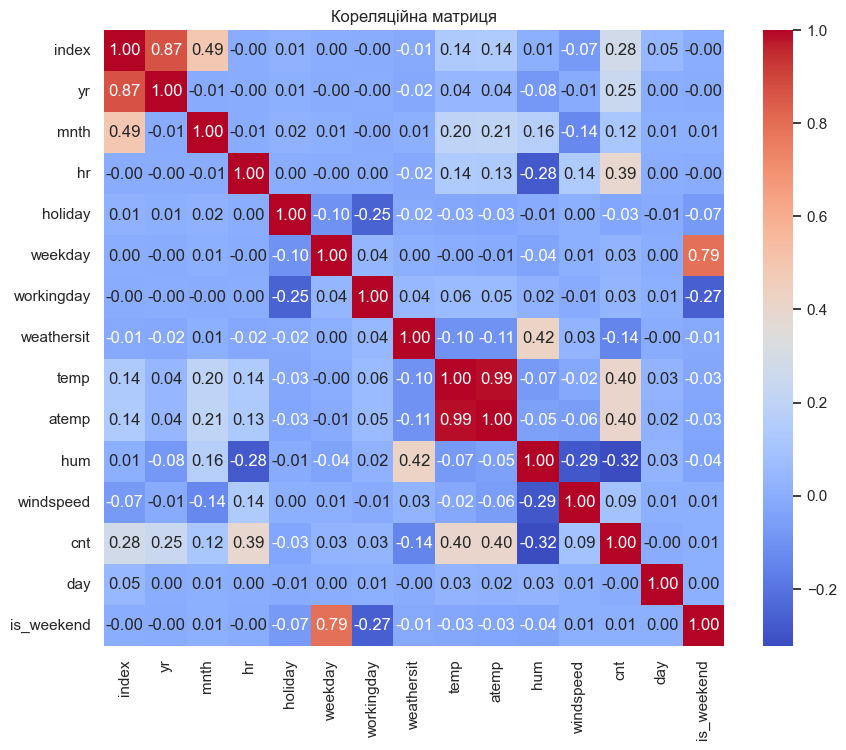

Середньоквадратична похибка (MSE): 4956.34
Коефіцієнт детермінації (R²): 0.84


C:\Users\romad\AppData\Local\Temp\ipykernel_15920\1836662908.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Важливість", y="Ознака", data=importance, palette="viridis")


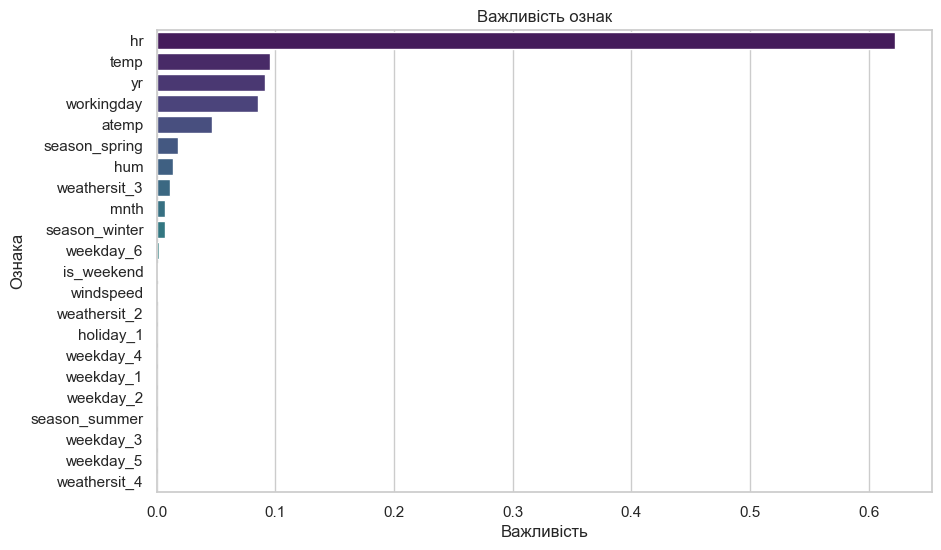

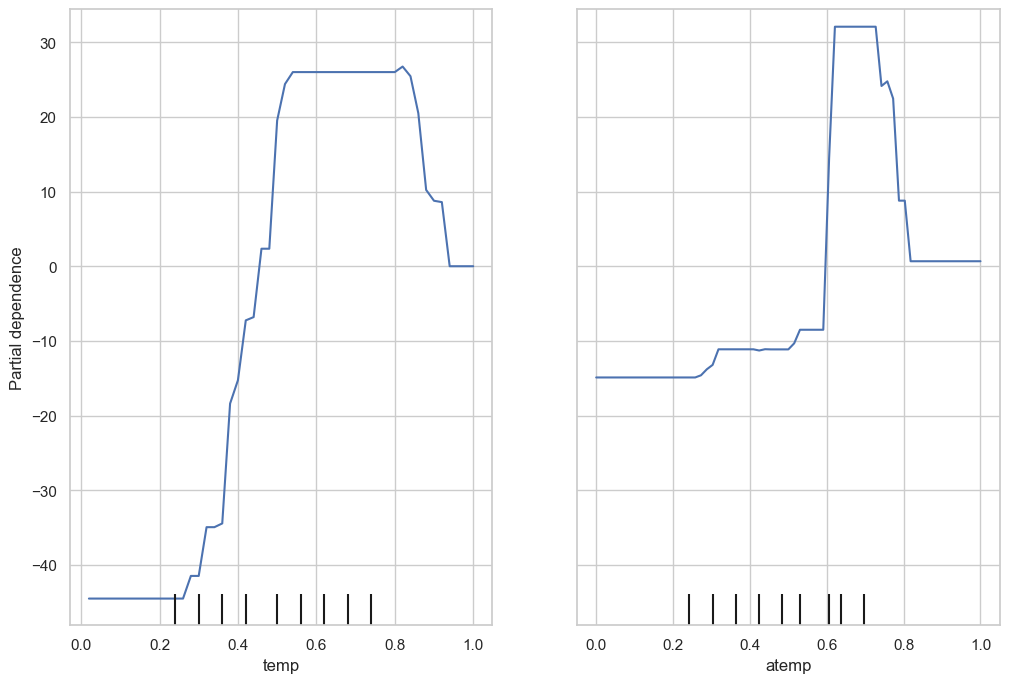

Кількість виявлених аномалій: 244


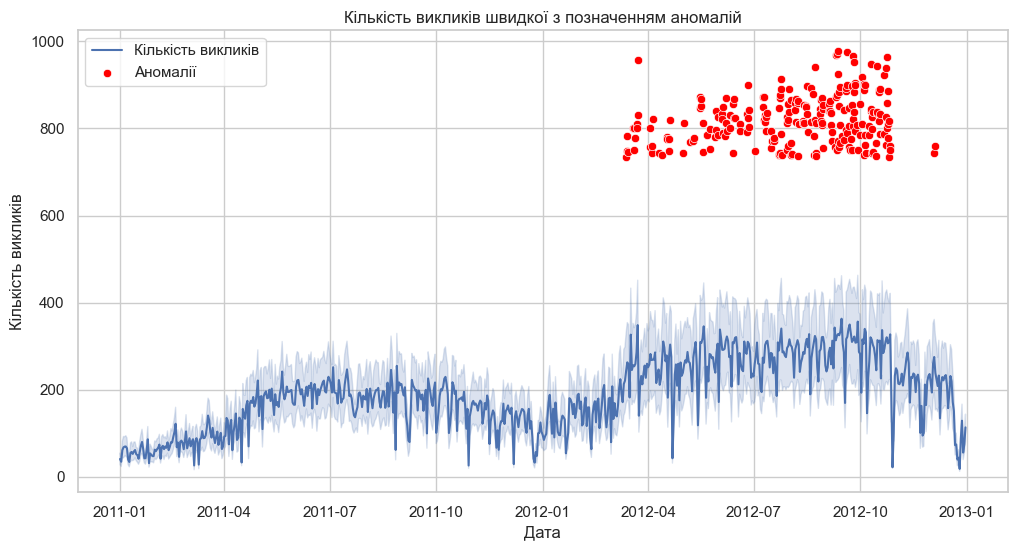

In [4]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Завантажуємо датасет
data = pd.read_csv("motorbike_ambulance_calls.csv")

# Дослідження та очищення даних
print("Інформація про датасет:")
print(data.info())
print("\nПропущені значення:")
print(data.isnull().sum())

# Перетворюємо колонку `date` у формат дати та додаємо нові ознаки
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Описова статистика
print("\nОписова статистика:")
print(data.describe())

# Вибір лише числових колонок для кореляційного аналізу
numeric_data = data.select_dtypes(include=[np.number])

# Кореляційний аналіз
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

# Вибір ознак та цільової змінної
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'is_weekend']
target = 'cnt'

X = data[features]
y = data[target]

# Кодуємо категорійні змінні
X = pd.get_dummies(X, columns=['season', 'holiday', 'weekday', 'weathersit'], drop_first=True)

# Розподіл даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі регресії: Gradient Boosting
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Метрики оцінки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Середньоквадратична похибка (MSE): {mse:.2f}")
print(f"Коефіцієнт детермінації (R²): {r2:.2f}")

# Важливість ознак
importance = pd.DataFrame({
    "Ознака": X.columns,
    "Важливість": model.feature_importances_
}).sort_values(by="Важливість", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Важливість", y="Ознака", data=importance, palette="viridis")
plt.title("Важливість ознак")
plt.show()

# Перевірка монотонності за допомогою PartialDependenceDisplay
features_to_plot = ['temp', 'atemp']
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X_train, features_to_plot, ax=ax)
plt.show()

# Виявлення подій та аномалій
# Обчислюємо z-оцінки для аномалій
data['z_score'] = (data['cnt'] - data['cnt'].mean()) / data['cnt'].std()
anomalies = data[data['z_score'].abs() > 3]
print(f"Кількість виявлених аномалій: {len(anomalies)}")

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='cnt', label='Кількість викликів')
sns.scatterplot(data=anomalies, x='date', y='cnt', color='red', label='Аномалії')
plt.title("Кількість викликів швидкої з позначенням аномалій")
plt.xlabel("Дата")
plt.ylabel("Кількість викликів")
plt.legend()
plt.show()

# Збереження аномалій у файл для звіту
anomalies.to_csv("anomalies_detected.csv", index=False)
